In [240]:
#pip install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import joblib
import warnings 
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/SeoulHangangB.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [242]:
train = pd.read_csv('./train.csv', encoding='utf-8')
test = pd.read_csv('./test.csv', encoding='utf-8')

## 날짜데이터

In [243]:
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['년'] = df['일자'].dt.year
    df['월'] = df['일자'].dt.month
    df['일'] = df['일자'].dt.day
    #df = df.drop('일자', axis=1)
    return df

In [244]:
# General preprocessing
train = process_date(train)
day_encoder = LabelEncoder()
train['요일'] = day_encoder.fit_transform(train['요일'])

test = process_date(test)
day_encoder = LabelEncoder()
test['요일'] = day_encoder.fit_transform(test['요일'])

In [245]:
train.to_csv('dataset/train_date.csv', index=False)
test.to_csv('dataset/test_date.csv', index=False)

## 공휴일

In [246]:
load_date = True
try:
    if load_date:
        train = pd.read_csv('dataset/train_date.csv')
        test = pd.read_csv('dataset/test_date.csv')
        print('Dataset loaded')
    else:
        print('Not loaded')
except:
    print('Dataset not found')

Dataset loaded


In [247]:
#공휴일 지정 노가다
train['공휴일전후'] = 0
test['공휴일전후'] = 0

train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 1
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 1
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

test['공휴일전후'][10] =1
test['공휴일전후'][20] = 1

In [248]:
train.to_csv('dataset/train_holidays.csv', index=False)
test.to_csv('dataset/test_holidays.csv', index=False)

## 메뉴

In [249]:
load_holidays = True
try:
    if load_holidays:
        train = pd.read_csv('dataset/train_holidays.csv')
        test = pd.read_csv('dataset/test_holidays.csv')
        print('Dataset loaded')
    else:
        print('Not loaded')
except:
    print('Dataset not found')

Dataset loaded


In [250]:
menu = pd.read_csv('./menu.csv')

In [251]:
menu['메뉴'] = menu['Unnamed: 0.1.1']
menu.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

In [252]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

In [253]:
train['중식메뉴_split'] = train['중식메뉴'].apply(lambda x: get_food_embedding(x))
train['석식메뉴_split'] = train['석식메뉴'].apply(lambda x: get_food_embedding(x))

test['중식메뉴_split'] = test['중식메뉴'].apply(lambda x: get_food_embedding(x))
test['석식메뉴_split'] = test['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [254]:
lunch_1hot = []
for ln in train.중식메뉴_split:
    mask = np.zeros(35)
    for elm in ln:
        if elm in list(menu['메뉴']):
            mask = mask + menu[menu['메뉴'] == elm].iloc[:,:-1].to_numpy()[0]
    if mask.sum() != 0:
        mask = mask / mask.sum()
    lunch_1hot.append(mask)

dinner_1hot = []
for ln in train.석식메뉴_split:
    mask = np.zeros(35)
    for elm in ln:
        if elm in list(menu['메뉴']):
            mask = mask + menu[menu['메뉴'] == elm].iloc[:,:-1].to_numpy()[0]
    if mask.sum() != 0:
        mask = mask / mask.sum()
    dinner_1hot.append(mask)
    
lunch_1hot_t = []
for ln in test.중식메뉴_split:
    mask = np.zeros(35)
    for elm in ln:
        if elm in list(menu['메뉴']):
            mask = mask + menu[menu['메뉴'] == elm].iloc[:,:-1].to_numpy()[0]
    if mask.sum() != 0:
        mask = mask / mask.sum()
    lunch_1hot_t.append(mask)

dinner_1hot_t = []
for ln in test.석식메뉴_split:
    mask = np.zeros(35)
    for elm in ln:
        if elm in list(menu['메뉴']):
            mask = mask + menu[menu['메뉴'] == elm].iloc[:,:-1].to_numpy()[0]
    if mask.sum() != 0:
        mask = mask / mask.sum()
    dinner_1hot_t.append(mask)

In [255]:
# 합이 0인 개수
count=0
for idx, arr in enumerate(dinner_1hot_t):
    if np.sum(arr) == 0:
        print(idx, arr)
        count += 1
count

5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1

In [256]:
tmp_ln = pd.DataFrame(lunch_1hot, columns=menu.columns[:-1])
train_ln = pd.concat([train, tmp_ln], axis=1)

tmp_dn = pd.DataFrame(dinner_1hot, columns=menu.columns[:-1])
train_dn = pd.concat([train, tmp_dn], axis=1)

tmp_ln_t = pd.DataFrame(lunch_1hot_t, columns=menu.columns[:-1])
test_ln = pd.concat([test, tmp_ln_t], axis=1)

tmp_dn_t = pd.DataFrame(dinner_1hot_t, columns=menu.columns[:-1])
test_dn = pd.concat([test, tmp_dn_t], axis=1)

In [257]:
train_ln.to_csv('dataset/train_lunch_menu.csv', index=False)
train_dn.to_csv('dataset/train_dinner_menu.csv', index=False)
test_ln.to_csv('dataset/test_lunch_menu.csv', index=False)
test_dn.to_csv('dataset/test_dinner_menu.csv', index=False)

## 식사가능자

In [16]:
load_menu = True
try:
    if load_menu:
        train_ln = pd.read_csv('dataset/train_lunch_menu.csv')
        train_dn = pd.read_csv('dataset/train_dinner_menu.csv')
        test_ln = pd.read_csv('dataset/test_lunch_menu.csv')
        test_dn = pd.read_csv('dataset/test_dinner_menu.csv')
        print('Dataset loaded')
    else:
        print('Not loaded')
except:
    print('Dataset not found')

Dataset loaded


In [17]:
# 식사가능자
train_ln['식사가능자'] = train_ln['본사정원수'] - train_ln['본사휴가자수']  - train_ln['현본사소속재택근무자수']
train_dn['식사가능자'] = train_dn['본사정원수'] - train_dn['본사휴가자수']  - train_dn['현본사소속재택근무자수'] - train_dn['본사출장자수']

test_ln['식사가능자'] = test_ln['본사정원수'] - test_ln['본사휴가자수'] - test_ln['현본사소속재택근무자수']
test_dn['식사가능자'] = test_dn['본사정원수'] - test_dn['본사휴가자수'] - test_dn['현본사소속재택근무자수'] - test_dn['본사출장자수']

In [18]:
train_ln.to_csv('dataset/train_lunch_av.csv', index=False)
train_dn.to_csv('dataset/train_dinner_av.csv', index=False)
test_ln.to_csv('dataset/test_lunch_av.csv', index=False)
test_dn.to_csv('dataset/test_dinner_av.csv', index=False)

## 날씨데이터

In [2]:
load_av = True
try:
    if load_av:
        train_ln = pd.read_csv('dataset/train_lunch_av.csv')
        train_dn = pd.read_csv('dataset/train_dinner_av.csv')
        test_ln = pd.read_csv('dataset/test_lunch_av.csv')
        test_dn = pd.read_csv('dataset/test_dinner_av.csv')
        print('Dataset loaded')
    else:
        print('Not loaded')
except:
    print('Dataset not found')

Dataset loaded


In [3]:
weather = pd.read_csv('dataset/기상청.csv', encoding='cp949')

In [4]:
weather.fillna(0, inplace=True)

In [5]:
weather['날짜'] = pd.to_datetime(weather['날짜'] ,format="%Y-%m-%d")

In [6]:
weather.sample(10)

,날짜,지점,강수량(mm)
505,2017-06-20,108,0.0
1239,2019-06-24,108,0.0
313,2016-12-10,108,0.0
1820,2021-01-25,108,0.0
1079,2019-01-15,108,0.0
1562,2020-05-12,108,0.7
524,2017-07-09,108,32.5
1428,2019-12-30,108,0.4
535,2017-07-20,108,0.0
315,2016-12-12,108,0.0


In [7]:
train_ln['강수량'] = 0.
train_dn['강수량'] = 0.
for i in range(len(train_ln)):
    train_ln['강수량'][i] = weather[weather['날짜'] == train_ln['일자'][i]]['강수량(mm)']
    train_dn['강수량'][i] = weather[weather['날짜'] == train_dn['일자'][i]]['강수량(mm)']


test_ln['강수량'] = 0.
test_dn['강수량'] = 0.
for i in range(len(test_ln)):
    test_ln['강수량'][i] = weather[weather['날짜'] == test_ln['일자'][i]]['강수량(mm)']
    test_dn['강수량'][i] = weather[weather['날짜'] == test_dn['일자'][i]]['강수량(mm)']

In [8]:
train_ln.to_csv('dataset/train_lunch_final.csv', index=False)
train_dn.to_csv('dataset/train_dinner_final.csv', index=False)
test_ln.to_csv('dataset/test_lunch_final.csv', index=False)
test_dn.to_csv('dataset/test_dinner_final.csv', index=False)

## 상관계수

In [13]:
train_ln.corr().loc[['중식계', '석식계']]

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,년,월,...,조림류,찜류,튀김류,샐러드류,단품류,유제품,빵과자류,음료.및.주류,식사가능자,강수량
중식계,0.584193,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.078804,-0.154664,...,-0.071523,-0.004798,-0.035566,-0.032982,-0.032804,0.000444,NaN,0.002365,0.151029,0.041136
석식계,0.292941,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.194792,-0.127142,...,-0.004765,0.025334,-0.056793,-0.164431,-0.140177,0.011802,NaN,-0.060656,0.118615,0.006266


<AxesSubplot:>

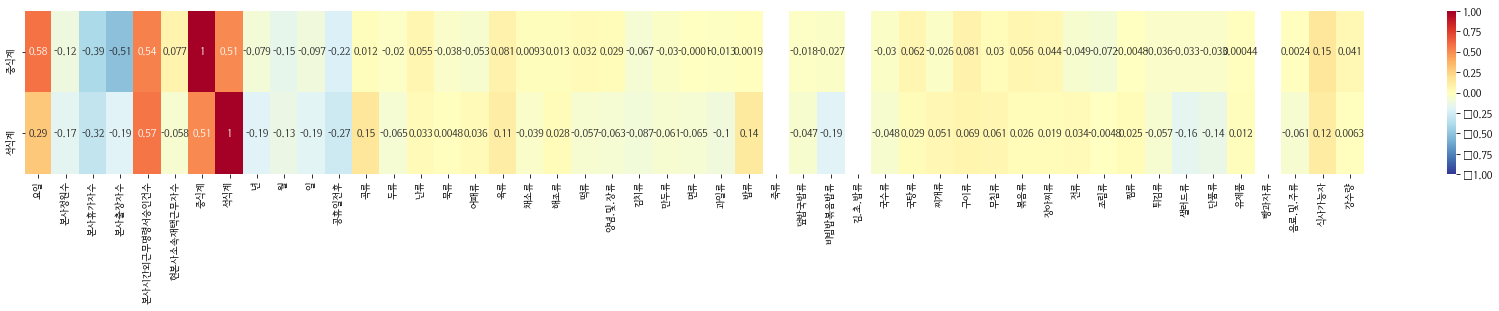

In [20]:
plt.figure(figsize=(30, 3))
tmp = train_ln.corr().loc[['중식계', '석식계']]
sns.heatmap(tmp,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )